In [119]:
#!/usr/bin/python3
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np
import math
import json
from os import listdir
from os.path import isfile, join
import sys
import glob
import graph_tool.all as gt
from datetime import datetime, date, time
from pyhive import hive
import ast
from queue import LifoQueue, Queue

In [120]:
df = pd.read_csv('/local0/serverless-sim/benchmark/serialization.log', 
                 names=['dims', 'size', 'serialization', 'deserialization', 'repeat'])

df['dim'] = df['dims']//1024 
df

,dims,size,serialization,deserialization,repeat,dim
0,1048576,3110,0.001019,0.000187,0,1024
1,1048576,3110,0.000709,0.000139,1,1024
2,1048576,3110,0.000668,0.000133,2,1024
3,1048576,3110,0.000813,0.000158,3,1024
4,1048576,3110,0.000710,0.000150,4,1024
...,...,...,...,...,...,...
185,15393162788864,37644670280,2124.614199,175.440625,0,15032385536
186,15393162788864,37644670280,2089.962878,225.166423,1,15032385536
187,15393162788864,37644670280,2119.388994,242.987164,2,15032385536
188,15393162788864,37644670280,2059.592494,193.922418,3,15032385536


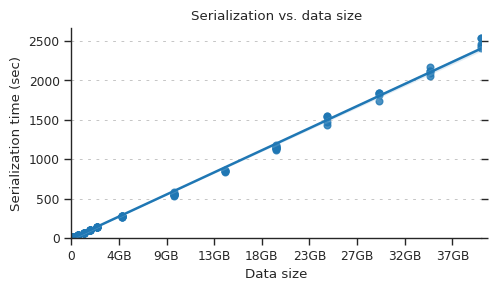

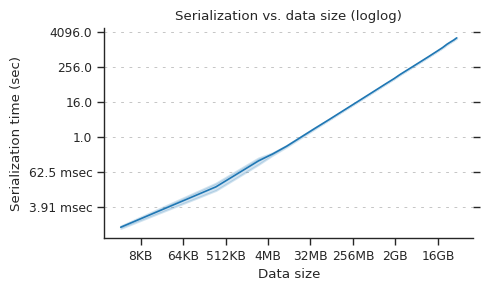

In [121]:
def format_xticks(x, pos=None):
    if x <= 0 : return '0'
    log2 = math.log2(int(x))
    
    if log2 < 10: return x
    if log2 < 20: return f'{int(math.pow(2, log2 - 10))}KB'
    if log2 < 30: return f'{int(math.pow(2, log2 - 20))}MB'
    if log2 < 40: return f'{int(math.pow(2, log2 - 30))}GB'
    return x 

def format_yticks(_y, pos=None):
    y = float(_y)
    if y < 0.001: return f'{round(y*1000000, 2)} usec'
    if y < 1: return f'{round(y*1000, 2)} msec'
    return y 

sns.set_style("ticks")
sns.set_context("paper", font_scale=1)
sns.set_context(rc = {'patch.linewidth': 1.5, 'patch.color': 'black'})


fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x = 'size', y = 'serialization', data = df, ax = ax)

sns.despine()
ax.yaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)

ax.set_xlim(left=0); 
ax.set_ylim(bottom=0);

ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))

ax.set_title('Serialization vs. data size'); ax.set_xlabel('Data size'); ax.set_ylabel('Serialization time (sec)'); 

plt.tight_layout()
plt.savefig('/local0/serverless-sim/benchmark/fig_serialization.png', format='png', dpi=200)
plt.show()



fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x = 'size', y = 'serialization', data = df, ax = ax)

sns.despine()
ax.yaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)


ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major')
ax.yaxis.set_ticks_position('both')

ax.set_xscale('log', base = 2) 
ax.set_yscale('log', base = 2) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

ax.set_title('Serialization vs. data size (loglog)'); ax.set_xlabel('Data size'); ax.set_ylabel('Serialization time (sec)'); 

plt.tight_layout()
plt.savefig('/local0/serverless-sim/benchmark/fig_serialization_loglog.png', format='png', dpi=200)
plt.show()

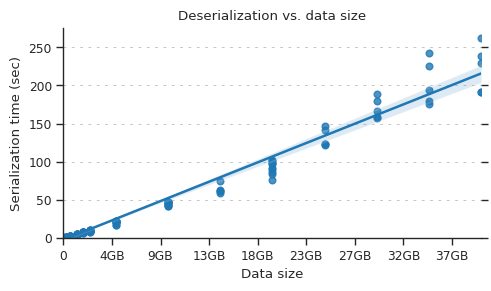

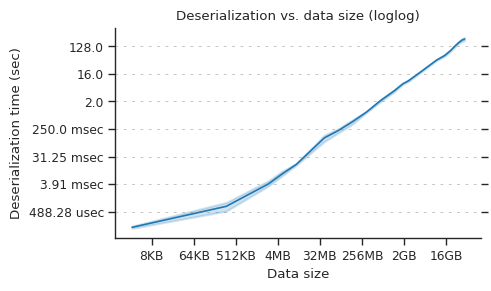

In [122]:
sns.set_style("ticks")
sns.set_context("paper", font_scale=1)
sns.set_context(rc = {'patch.linewidth': 1.5, 'patch.color': 'black'})


fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x = 'size', y = 'deserialization', data = df, ax = ax)

sns.despine()
ax.yaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)

ax.set_xlim(left=0); 
ax.set_ylim(bottom=0);

ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major')
ax.yaxis.set_ticks_position('both')

#ax.set_xscale('log', base = 2) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))

ax.set_title('Deserialization vs. data size'); ax.set_xlabel('Data size'); ax.set_ylabel('Serialization time (sec)'); 

plt.tight_layout()
plt.savefig('/local0/serverless-sim/benchmark/fig_deserialization.png', format='png', dpi=200)
plt.show()


fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(x = 'size', y = 'deserialization', data = df, ax = ax)

sns.despine()
ax.yaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)

#ax.set_xlim(left=0); 
#ax.set_ylim(bottom=0);

ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major')
ax.yaxis.set_ticks_position('both')

ax.set_xscale('log', base = 2) 
ax.set_yscale('log', base = 2) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))


ax.set_title('Deserialization vs. data size (loglog)'); ax.set_xlabel('Data size'); ax.set_ylabel('Deserialization time (sec)'); 

plt.tight_layout()
plt.savefig('/local0/serverless-sim/benchmark/fig_deserialization_loglog.png', format='png', dpi=200)
plt.show()


In [123]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a*np.power(x, b)

pars, cov = curve_fit(f=power_law, xdata=df['size'].values, ydata=df['serialization'].values, p0=[0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = ydata=df['serialization'].values - power_law(df['size'].values, *pars)

pars, sum(res)/len(res)

(array([8.85909126e-09, 1.07616628e+00]), 1.8212762622319778)

In [112]:
# Function to calculate the power-law with constants a and b


# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

# Generate dummy dataset
x_dummy = np.linspace(start=5, stop=15, num=50)

# Calculate y-values based on dummy x-values
y_dummy = exponential(x_dummy, 0.5, 0.5)

# Add noise from a Gaussian distribution
noise = 5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot the noisy exponential data
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Set the y-axis scaling to logarithmic
ax.set_yscale('log')
# Set the y-ticks
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the y-axis limits
ax.set_ylim(0.1, 1000)

# Plot the fit data as an overlay on the scatter data
ax.plot(x_dummy, exponential(x_dummy, *pars), linestyle='--', linewidth=2, color='black')

# Fit the dummy exponential data
pars, cov = curve_fit(f=exponential, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = y_dummy - exponential(x_dummy, *pars)

# Generate dummy dataset
x_dummy = np.linspace(start=1, stop=1000, num=100)
y_dummy = power_law(x_dummy, 1, 0.5)
# Add noise from a Gaussian distribution
noise = 1.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the axis limits
ax.set_xlim(10, 1000)
ax.set_ylim(1, 100)

# Fit the dummy power-law data
pars, cov = curve_fit(f=power_law, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = y_dummy - power_law(x_dummy, *pars)